In [55]:
### testing machine learning studio CNN api
# refer to https://gallery.azure.ai/Experiment/Neural-Network-Convolution-and-pooling-deep-net-2

In [2]:
from torchvision.datasets.mnist import MNIST
import numpy as np
dataset = MNIST(root='./data', download=False, train=False)

X_test = np.expand_dims(getattr(dataset, 'test_data').numpy().astype('float32'), 1)/255.0
y_test = getattr(dataset, 'test_labels').numpy().astype('int64')

indices = np.random.permutation(len(X_test))
X_test = X_test[indices]
y_test = y_test[indices]

X_test.shape

(10000, 1, 28, 28)

In [3]:
import random
import urllib.request
import json

### randomly choose a number in MNIST test dataset , which the model hasnt trained on
rn=random.randint(0, len(y_test))
print(rn)
corr_label=y_test[rn]
print("true label", corr_label)
input1={}
input1['Label']=str(corr_label)
for x, y  in zip (range(784),X_test[rn].reshape(784)):
    input1['f'+str(x)]=str(int(y))


print(input1.items())

9931
true label 2


dict_items([('Label', '2'), ('f0', '0'), ('f1', '0'), ('f2', '0'), ('f3', '0'), ('f4', '0'), ('f5', '0'), ('f6', '0'), ('f7', '0'), ('f8', '0'), ('f9', '0'), ('f10', '0'), ('f11', '0'), ('f12', '0'), ('f13', '0'), ('f14', '0'), ('f15', '0'), ('f16', '0'), ('f17', '0'), ('f18', '0'), ('f19', '0'), ('f20', '0'), ('f21', '0'), ('f22', '0'), ('f23', '0'), ('f24', '0'), ('f25', '0'), ('f26', '0'), ('f27', '0'), ('f28', '0'), ('f29', '0'), ('f30', '0'), ('f31', '0'), ('f32', '0'), ('f33', '0'), ('f34', '0'), ('f35', '0'), ('f36', '0'), ('f37', '0'), ('f38', '0'), ('f39', '0'), ('f40', '0'), ('f41', '0'), ('f42', '0'), ('f43', '0'), ('f44', '0'), ('f45', '0'), ('f46', '0'), ('f47', '0'), ('f48', '0'), ('f49', '0'), ('f50', '0'), ('f51', '0'), ('f52', '0'), ('f53', '0'), ('f54', '0'), ('f55', '0'), ('f56', '0'), ('f57', '0'), ('f58', '0'), ('f59', '0'), ('f60', '0'), ('f61', '0'), ('f62', '0'), ('f63', '0'), ('f64', '0'), ('f65', '0'), ('f66', '0'), ('f67', '0'), ('f68', '0'), ('f69', '0'), ('

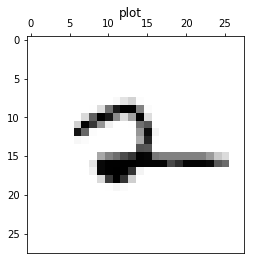

In [15]:
def show(image, txt="plot"):
    """
    Render a given numpy.uint8 2D array of pixel data.
    """
    from matplotlib import pyplot
    import matplotlib as mpl
    fig = pyplot.figure()
    ax = fig.add_subplot(1,1,1)
    imgplot = ax.imshow(image, cmap=mpl.cm.Greys)
    imgplot.set_interpolation('nearest')
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    
    pyplot.suptitle(txt)
    pyplot.show()
show(X_test[rn].reshape(28,28))

In [6]:
d = {
        "Inputs": {"input1":[input1]},
    "GlobalParameters":  {
    }
}
#data=json.dumps(dat)
print(type(d))
print(type(d["Inputs"]))
print(type(d["Inputs"]["input1"][0]))

<class 'dict'>
<class 'dict'>
<class 'dict'>


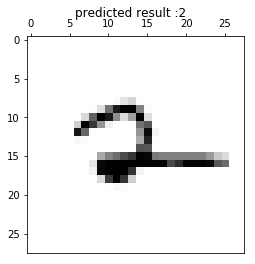

In [16]:

body = str.encode(json.dumps(d))

url = 'https://ussouthcentral.services.azureml.net/workspaces/92501e700e204434b9d7992c291480f6/services/3737183354544a88be84febf150847a8/execute?api-version=2.0&format=swagger'
api_key = 'replace_with_your_api_key' # Replace this with the API key for the web service
headers = {'Content-Type':'application/json', 'Authorization':('Bearer '+ api_key)}

req = urllib.request.Request(url, body, headers)

try:
    response = urllib.request.urlopen(req)

    result = response.read()
    d_result=json.loads(result)
    t=d_result["Results"]["output1"][0]["Label"]
    #print(result)
    #print("predicted result :{}".format(t))
    show(X_test[rn].reshape(28,28),"predicted result :{}".format(t))
    

except urllib.error.HTTPError as error:
    print("The request failed with status code: " + str(error.code))

    # Print the headers - they include the requert ID and the timestamp, which are useful for debugging the failure
    print(error.info())
    print(json.loads(error.read().decode("utf8", 'ignore')))